In [4]:
import numpy as np
from cmath import sqrt

# Problem 1 - Golden Section

In [5]:
def golden_section(f,a,b,tol,maxiters):
    x_0=(a+b)*1.0/2
    psi=(1+sqrt(5))/2
    for i in range(maxiters):
        a_tilde=b-(b-a)*1.0/psi
        b_tilde=a+(b-a)*1.0/psi
        if f(a_tilde)<=f(b_tilde):
            b=b_tilde
        else:
            a=a_tilde
        x_1=(a+b)/2
        if abs(x_0-x_1)<tol:
            break
        x_0=x_1
    return x_0

In [6]:
f = lambda x : np.exp(x) - 4*x
a=0
b=3
tol=1e-25
maxiter=10000000

In [9]:
print(golden_section(f,a,b,tol,maxiter))

(1.3862943469048337+0j)


Inbuilt funtion

In [8]:
from scipy import optimize as opt
import numpy as np
result = opt.golden(f, brack=(0,3), tol=1e-25)
print(result)

1.3862943788626767


# Problem 2 - Newton's Method

In [78]:
def newtons_method(x,f,df,d2f,tol,maxiter):
    for i in range(maxiter):
        x_1=x-df(x)/d2f(x)
        if abs(x-x_1)<tol:
            break
        x=x_1
    return x

In [81]:
f= lambda x : x**2 + np.sin(5*x) 
df = lambda x : 2*x + 5*np.cos(5*x)
d2f = lambda x : 2 - 25*np.sin(5*x)
x=0
tol=1e-10
maxiter=500

In [82]:
print(newtons_method(x,f,df,d2f,tol,maxiter))

-1.4473142236328096


Inbuilt function

In [83]:
result = opt.newton(df, x0 = 0, fprime = d2f, tol = 1e-10, maxiter = 500)
print(result)

-1.4473142236328096


# Problem 3 - Secant Method

In [95]:
def secant_method(x_0,x_1,f,df,tol,maxiter):
    for i in range(maxiter):
        x_2=x_1-(x_1-x_0)/(df(x_1)-df(x_0))*df(x_1)
        if abs(x_2-x_1)<tol:
            break
        x_0,x_1=x_1,x_2
    return x_1

In [96]:
f = lambda x : x**2 + np.sin(x) + np.sin(10*x)
df = lambda x : 2*x + np.cos(x) + 10*np.cos(10*x)
x_0 = 0
x_1 = -1
tol=1e-10
maxiter=500

In [97]:
print(secant_method(x_0,x_1,f,df,tol,maxiter))

-0.16367722118191103


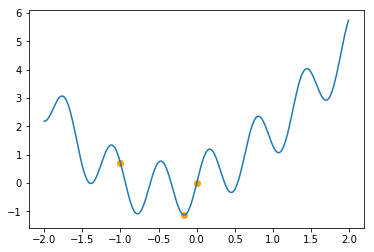

In [117]:
import matplotlib.pyplot as plt

scatter_pts = np.array([0,-1,-0.16367722118191103])
dom = np.arange(-2,2,.01)
plt.plot(dom, f(dom))
plt.scatter(scatter_pts,f(scatter_pts),color='orange')
plt.show()


Inbuilt funtion

In [98]:
result = opt.newton(df, x0 = x_0, tol = tol, maxiter = maxiter)
print(result)

-3.2149595174761636


# Problem 4 - Backtracking

In [236]:
f = lambda x: x[0]**2 + x[1]**2 + x[2]**2
df = lambda x: np.array([2*x[0],2*x[1],2*x[2]])
x = np.array([150., .03, 40.])
p = np.array([-.5, -100., -4.5])
c = .5
rho = .95
alpha = 1

In [241]:
def backtracking(f,df,x,p,alpha,rho,c):
    dfp = np.matmul(np.transpose(df(x)), p)
    while( f(x + alpha*p) > (f(x)+c*alpha*dfp)):
        alpha = rho * alpha
    return alpha

In [242]:
print(backtracking(f,df,x,p,alpha,rho,c))

0.0248942806191894


Inbuilt function

In [244]:
from autograd import grad
phi = lambda alpha: f(x + alpha*p)
derphi = grad(phi)
alpha, _ = opt.linesearch.scalar_search_armijo(phi, phi(0.), derphi(0.))
print(alpha)

0.025747218202684496
